Import utilized package

In [2]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Double Pendulum System State space form

In [46]:
def double_Pendulum(state, t):
    '''
    :param state: state[0]:theta1  state[1]:theta1_dot  state[2]:theta2  state[3]:theta2_dot
           (all with respect to vertical)
    :param t: simulation time
    :return: dydx: derivative of state with respect to time
    '''
    noise = 0.0
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    del_ = state[2] - state[0] + noise
    den1 = (M1 + M2) * L1 - M2 * L1 * cos(del_) * cos(del_)
    dydx[1] = (M2 * L1 * state[1] * state[1] * sin(del_) * cos(del_) +
               M2 * G * sin(state[2]) * cos(del_) +
               M2 * L2 * state[3] * state[3] * sin(del_) -
               (M1 + M2) * G * sin(state[0])) / den1
    dydx[2] = state[3]
    den2 = (L2 / L1) * den1
    dydx[3] = (-M2 * L2 * state[3] * state[3] * sin(del_) * cos(del_) +
               (M1 + M2) * G * sin(state[0]) * cos(del_) -
               (M1 + M2) * L1 * state[1] * state[1] * sin(del_) -
               (M1 + M2) * G * sin(state[2])) / den2
    dydx = dydx
    return dydx

Lorenz System State Space form

In [32]:
def lorenz_system(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

Set parameters (2 Turning Params) and simulation (Double Pendulum)

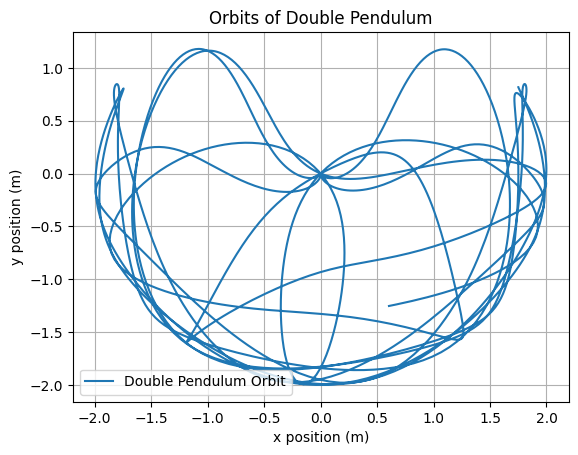

In [50]:
# System params
G = 9.81  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg

# Time points to solve the system for
dt = 0.01
t = np.arange(0.0, 20.0, dt)  # Turn param 1: Time

# Initial Conditions (Turn param 2)
# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 130.0
th2 = 100.0
w1 =  3.0
w2 = 0.0
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(double_Pendulum, state, t)

# Pendulum 1 and Pendulum 2 position in Euclidean Coordinate
P1 = np.dstack([L1 * sin(y[:, 0]), -L1 * cos(y[:, 0])]).squeeze()
P2 = P1 + np.dstack([L2 * sin(y[:, 2]), -L2 * cos(y[:, 2])]).squeeze()


plt.figure()
# plt.plot(P1[:, 0], P1[:, 1], label='Pendulum 1')
plt.plot(P2[:, 0], P2[:, 1], label='Double Pendulum Orbit')
plt.title('Orbits of Double Pendulum')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.legend()
plt.grid()
plt.show()

Set parameters (2 Turning Params) and simulation (Lorenz System)

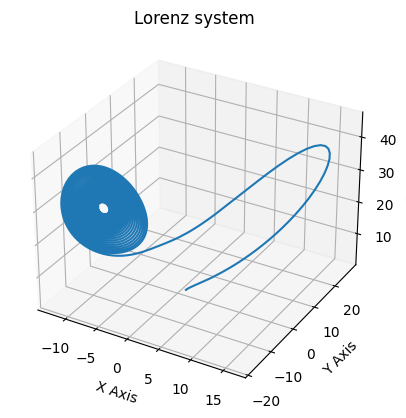

In [51]:
# Lorenz system parameters (Turning params 1)
sigma = 5.0
beta = 8.0 / 3.0
rho = 28.0

# Initial state (Turning params 2)
initial_state = [1.0, 1.0, 1.0]

# Time points to solve the system for
dt = 0.01
t = np.arange(0.0, 20.0, dt)

# Solve the Lorenz system
state_Lorenz = integrate.odeint(lorenz_system, initial_state, t, args=(sigma, beta, rho))
X = state_Lorenz[:, 0]
Y = state_Lorenz[:, 1]
Z = state_Lorenz[:, 2]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(X, Y, Z)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz system")

plt.show()

Todo: Generate Trainning data and test data

Todo: Build Learning model

Todo: Set Comparing metrics among different learning methods